# Artificial Neural Nets - Gradient Descent 

#### The objective of the below implementation is to show how SGD(Stochastic Gradient Descent) can be used to optimize the networks
For better understanding, we assume a simple architecture which has 2 input units and 1 output layer. <br>
The output layer uses `sigmoid` as activation function. MSE(MeanSquaredError) is used as a Loss function at the output layer. 

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'

In [116]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-1 * z))

def loss(y_predict, y_target):
    return np.power((y_predict - y_target), 2)

# derivative of loss (w.r.t y_predict) 
def d_loss(y_predict, y_target):
    return 2.0 * (y_predict - y_target)

# derivative of sigmoid (w.r.t z)
def d_sigmoid(z):
    return sigmoid(z) * (1.0 - sigmoid(z))

# derivative of output z [w.r.t x(input x1 or x2)] as z = x1.w1 + x2.w2
def d_z(x):
    return x


In [81]:
# Define the Gradient Descent function 
# backward_result= result of the partial derivative of the backward pass
# lr= Learning Rate
def gradient_descent(w, backward_result, lr):
    return w - lr * backward_result

In [117]:
x = np.array([0.1, 0.2])
y_target = 0.3
lr = 0.1
iteration = 20000
w = np.array([np.random.rand(), np.random.rand()])
print("Input Vector: {}".format(x))
print("Weight Vector: {}".format(w))

Input Vector: [0.1 0.2]
Weight Vector: [0.63443782 0.85993795]


0.3000000000000227
weight: [-1.53102064 -3.47097898]


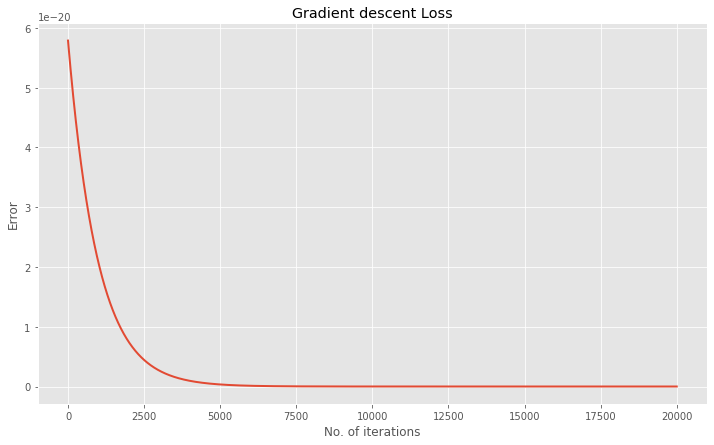

In [120]:
l = []

for i in range(iteration): 
    z = np.dot(x, w)
    y_predict = sigmoid(z)
    l.append(loss(y_predict, y_target))

    # Backward pass 
    d_loss_y = d_loss(y_predict, y_target)
    d_sigmoid_z = d_sigmoid(y_predict)
    d_z_x = d_z(x)
    # Compute the product of the partial derivative 
    backward_res = d_loss_y * d_sigmoid_z * d_z_x    
    w = gradient_descent(w, backward_res, lr)


print(y_predict)
print("weight: {}".format(w))

plt.plot([i for i in range(iteration)], l)
plt.title("Gradient descent Loss")
plt.xlabel("No. of iterations")
plt.ylabel("Error")
plt.show()